# Sweep laser pointer across the Moon from Earth

Plan: 
Use SymPy to:
1. Derive formula for distance Earth - Moon surface as a function of the sweep angle from Earth perspective
2. Derive formula for the arrival time as a function of the sweep angle under consideration of the sweep angular speed

Plot the following:
- Arrival time vs sweep angle
- Moon surface location vs sweep angle
...


In [118]:
import sympy
from sympy import *

# Constants
#x, y, s, sq = symbols('x y s sq', positive=True) #, real=True)

c = symbols('c', positive=True ) # speed of light in vacuum
R = symbols('R', positive=True ) # radius of the Moon (target sphere)
D = symbols('D', positive=True ) # Distance Earth to Moon center
alpha = symbols('alpha')         # Angle of laser pointer direction
L = symbols('L', positive=True ) # Flight path length (distance Earth - Moon surface point)
a, b = symbols('a b', positive=True ) # y and x coordinates of Moon surface point
t = symbols('t')  # time in seconds


In [119]:

geometry = solve([a*a + b*b - R*R, a - L*sin(alpha), D - b - L*cos(alpha)], L, a, b)
print( geometry[0] )
print( geometry[1] )
# select the relevant solution (must be less than D) 
pathLength = Lambda(alpha, geometry[0][0])  # define as function of alpha
surfacePointVertical = geometry[0][1]
surfacePointHorizontal = geometry[0][2]
#print(pathLength, surfacePointVertical, surfacePointHorizontal)


(D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2), (D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha), D*sin(alpha)**2 + sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha))
(D*cos(alpha) + sqrt(-D**2*sin(alpha)**2 + R**2), (D*cos(alpha) + sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha), D*sin(alpha)**2 - sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha))


In [120]:
pathLength

Lambda(alpha, D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))

In [121]:
surfacePointHorizontal

D*sin(alpha)**2 + sqrt(-D**2*sin(alpha)**2 + R**2)*cos(alpha)

In [122]:
surfacePointVertical

(D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)

In [123]:
# Angle of the surface point
beta = asin(surfacePointVertical/R)
beta

asin((D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)/R)

In [124]:
# Minimum and maximum ray distances
L_min = D - R
L_max = sqrt(D*D - R*R)

In [125]:
# Maximum angle of Moon (full moon appears with angular diameter 2 * alpha_max)
alpha_max = asin(R/D)
alpha_max

asin(R/D)

In [126]:
# Define a function for the surface angle beta with argument alpha
surfaceAngle = Lambda(alpha, beta)
surfaceAngle

Lambda(alpha, asin((D*cos(alpha) - sqrt(-D**2*sin(alpha)**2 + R**2))*sin(alpha)/R))

In [127]:
# Values for Earth - Moon system
speedOfLight = 300000.0      # speed of light in vacuum (km/s)
distanceEarthMoon = 382500.0 # distance Earth - Moon (average) (km)
moonRadius = 1737.5          # Moon radius (km)

In [128]:
# Replace variables with values for Earth - Moon system
surfaceAngleMoon = surfaceAngle.subs([(D, distanceEarthMoon), (R, moonRadius)])
surfaceAngleMoon

Lambda(alpha, asin(0.000575539568345324*(-382500.0*sqrt(2.06341578025546e-5 - sin(alpha)**2) + 382500.0*cos(alpha))*sin(alpha)))

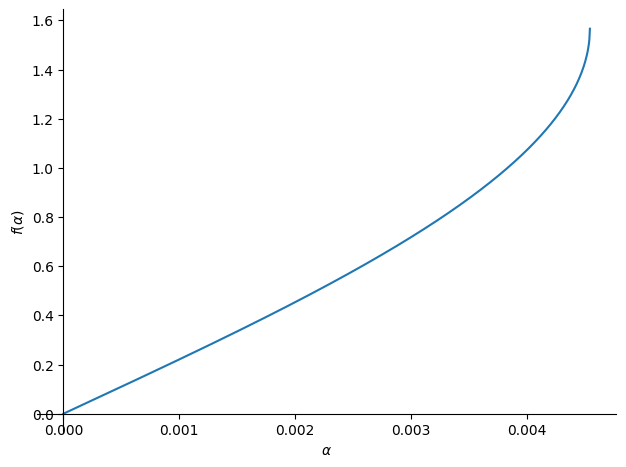

In [129]:
# 
alpha_maxMoon = alpha_max.subs([(D, distanceEarthMoon), (R, moonRadius)])
alpha_maxMoon
plot(surfaceAngleMoon(alpha), (alpha, 0, alpha_maxMoon))

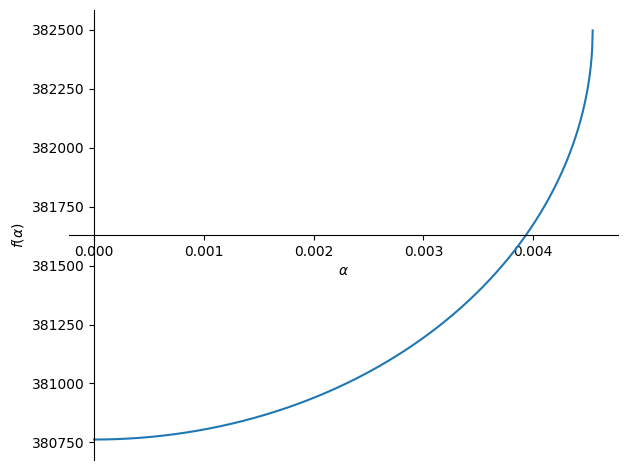

In [130]:
#
pathLengthMoon = pathLength.subs([(D, distanceEarthMoon), (R, moonRadius)])
pathLengthMoon

plot(pathLengthMoon(alpha), (alpha, alpha_maxMoon, 0))

In [133]:
# Sweep dynamics
sweepDuration = 1.0 # Sweep duration in seconds

angularSpeed = 2 * alpha_maxMoon / sweepDuration  # sweep angular speed in rad/sec

sweepAngle = Lambda(t, alpha_maxMoon - angularSpeed*t)


In [138]:
# 
arrivalTime = Lambda(t, t + pathLengthMoon(sweepAngle(t))/speedOfLight)

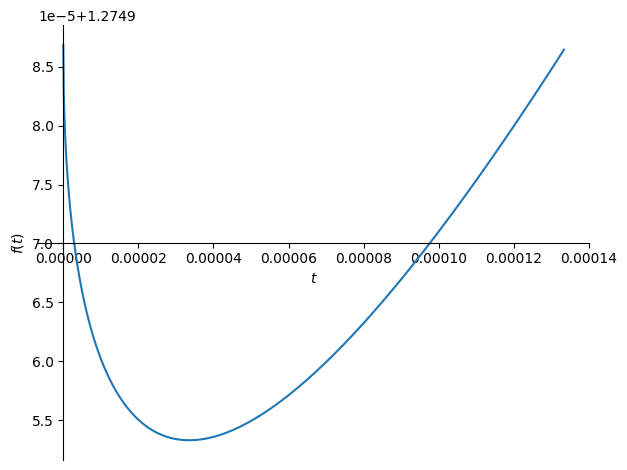

In [147]:
#
plot(arrivalTime(t), (t, 0, sweepDuration/7500))